Load all the packages that will be needed during this project

In [90]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import re


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airlinecarrier-library/airlines.csv
/kaggle/input/public-dataset/flights-original.csv


Reading the data file that contains the details of all the flights that occured in 2013. And then display the summary statistics of the cloumns to understancd their properties and functions

In [91]:
# Read the data
df = pd.read_csv('/kaggle/input/public-dataset/flights-original.csv')

In [92]:
#profile = pp.ProfileReport(df)
#profile

In [93]:
#Describe the data
df.describe(include='all')

Unnamed: 0      year          month            day       dep_time  \
count   336776.000000  336776.0  336776.000000  336776.000000  328521.000000   
unique            NaN       NaN            NaN            NaN            NaN   
top               NaN       NaN            NaN            NaN            NaN   
freq              NaN       NaN            NaN            NaN            NaN   
mean    168388.500000    2013.0       6.548510      15.710787    1349.109947   
std      97219.001466       0.0       3.414457       8.768607     488.281791   
min          1.000000    2013.0       1.000000       1.000000       1.000000   
25%      84194.750000    2013.0       4.000000       8.000000     907.000000   
50%     168388.500000    2013.0       7.000000      16.000000    1401.000000   
75%     252582.250000    2013.0      10.000000      23.000000    1744.000000   
max     336776.000000    2013.0      12.000000      31.000000    2400.000000   

        sched_dep_time      dep_delay       arr_time  sched_arr_time  \
count    336776.000000  328521.000000  328063.000000   336776.000000   
unique             NaN            NaN            NaN             NaN   
top                NaN            NaN            NaN             NaN   
freq               NaN            NaN            NaN             NaN   
mean       1344.254840      12.639070    1502.054999     1536.380220   
std         467.335756      40.210061     533.264132      497.457142   
min         106.000000     -43.000000       1.000000        1.000000   
25%         906.000000      -5.000000    1104.000000     1124.000000   
50%        1359.000000      -2.000000    1535.000000     1556.000000   
75%        1729.000000      11.000000    1940.000000     1945.000000   
max        2359.000000    1301.000000    2400.000000     2359.000000   

            arr_delay carrier         flight tailnum  origin    dest  \
count   327346.000000  336776  336776.000000  334264  336776  336776   
unique            NaN      16            NaN    4043       3     105   
top               NaN      UA            NaN  N725MQ     EWR     ORD   
freq              NaN   58665            NaN     575  120835   17283   
mean         6.895377     NaN    1971.923620     NaN     NaN     NaN   
std         44.633292     NaN    1632.471938     NaN     NaN     NaN   
min        -86.000000     NaN       1.000000     NaN     NaN     NaN   
25%        -17.000000     NaN     553.000000     NaN     NaN     NaN   
50%         -5.000000     NaN    1496.000000     NaN     NaN     NaN   
75%         14.000000     NaN    3465.000000     NaN     NaN     NaN   
max       1272.000000     NaN    8500.000000     NaN     NaN     NaN   

             air_time       distance           hour         minute  \
count   327346.000000  336776.000000  336776.000000  336776.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       150.686460    1039.912604      13.180247      26.230100   
std         93.688305     733.233033       4.661316      19.300846   
min         20.000000      17.000000       1.000000       0.000000   
25%         82.000000     502.000000       9.000000       8.000000   
50%        129.000000     872.000000      13.000000      29.000000   
75%        192.000000    1389.000000      17.000000      44.000000   
max        695.000000    4983.000000      23.000000      59.000000   

                  time_hour  
count                336776  
unique                 6936  
top     2013-09-13 08:00:00  
freq                     94  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

# 1. Reviewing the data

> ## **1.1** Checking all the numerical and categorical featres present in the dataset and pick the most useful of them.

In [94]:
# Numerical Features
numerical_features = df.select_dtypes(include=['float','int']).columns.tolist()
numerical_features

['Unnamed: 0',
 'year',
 'month',
 'day',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'flight',
 'air_time',
 'distance',
 'hour',
 'minute']

In [95]:
categorical_features=df.select_dtypes(exclude=['float','int']).columns.tolist()
categorical_features

['carrier', 'tailnum', 'origin', 'dest', 'time_hour']

 **Important features :**  
*  Numerical - 
 *  dep_delay
 *  arr_time
 *  arr_delay
 *  air_time
 *  distance
* Categorical - 
 *  carrier
 *  origin
 *  dest

This graphs shows Departure

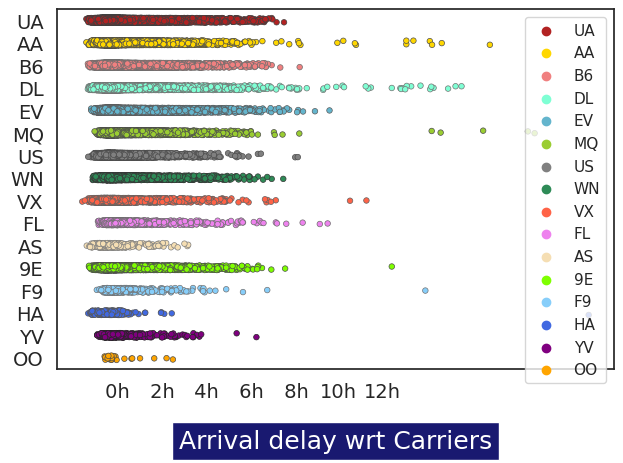

In [96]:
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue',
          'purple', 'orange']


# Specify the desired tick positions in minutes
tick_positions = [0, 120, 240, 360, 480, 600, 720]

# Set the tick positions on the x-axis
plt.xticks(tick_positions)

# Plot the graph
ax3 = sns.stripplot(y="carrier", x="arr_delay", size=4, palette=colors, hue='carrier',
                    data=df, linewidth=0.5, jitter=True)

# Set the font size for the tick labels
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

# Format the tick labels as hours and minutes
ax3.set_xticklabels(['{:2.0f}h'.format(*[int(y) for y in divmod(x, 60)])
                     for x in ax3.get_xticks()])

# Set the x-axis label and its properties
plt.xlabel('Arrival delay wrt Carriers', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)

# Hide the y-axis label
ax3.yaxis.label.set_visible(False)

# Add a legend with explicit location (e.g., upper right)
ax3.legend(loc='upper right')

# Adjust the layout
plt.tight_layout(w_pad=3)

# Show the plot
plt.show()

> ## **1.2** Checking Outliers

> > ### **1.2.1** Numerical features

<AxesSubplot:>

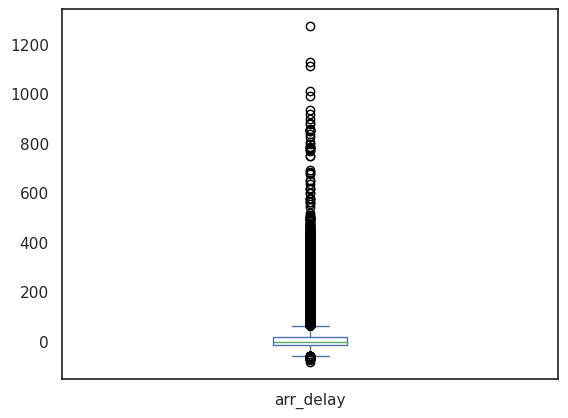

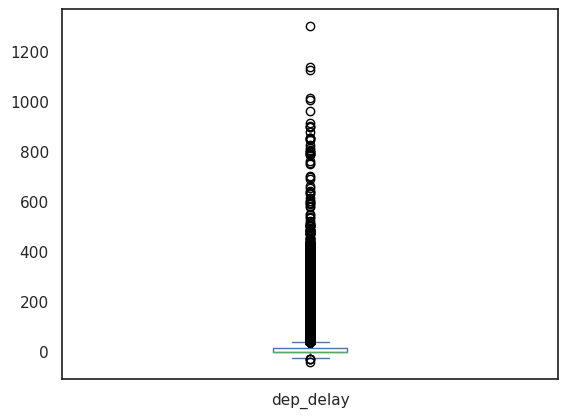

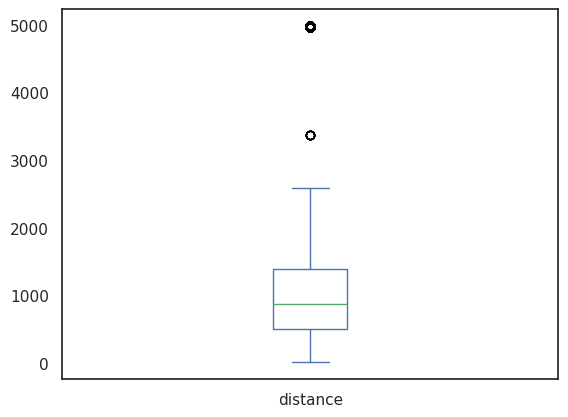

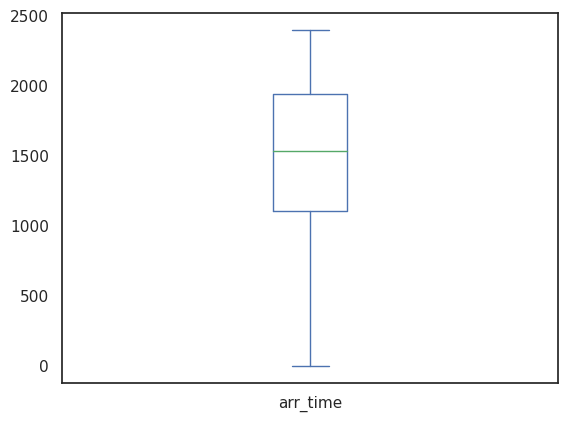

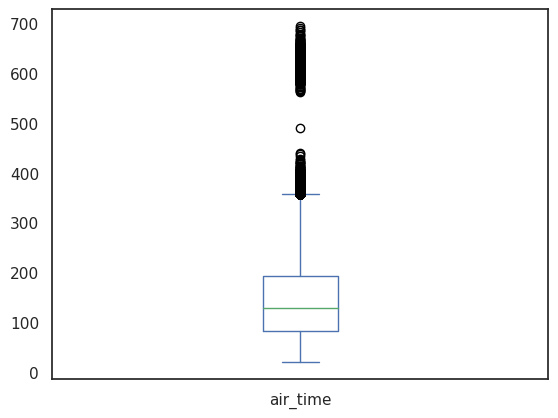

In [97]:
df[['arr_delay']].plot.box()
df[['dep_delay']].plot.box()
df[['distance']].plot.box()
df[['arr_time']].plot.box()
df[['air_time']].plot.box()

Since there are not much outliers in the dataset, we will move ahead with the same values.

> > ### **1.2.2** Categorical features

<AxesSubplot:>

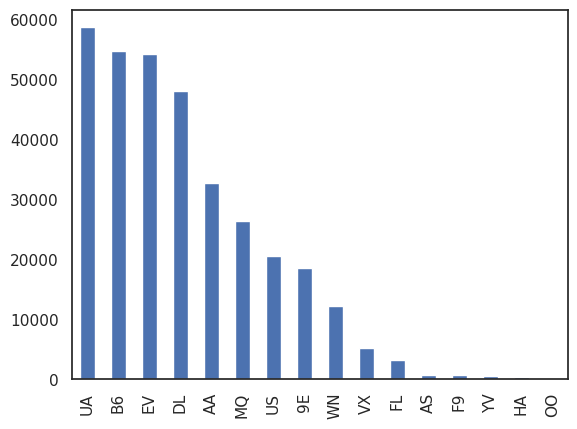

In [98]:
df['carrier'].value_counts().plot.bar()

<AxesSubplot:>

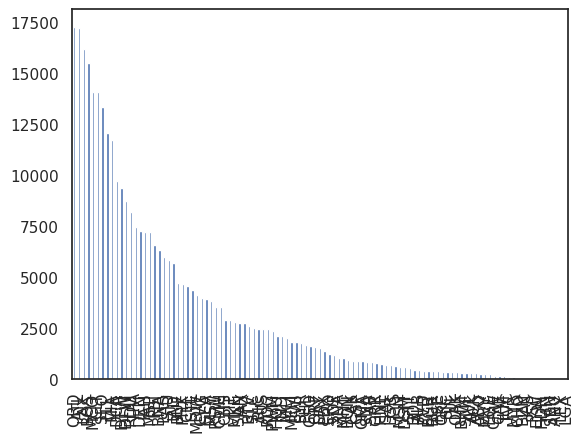

In [99]:
df['dest'].value_counts().plot.bar()

<AxesSubplot:>

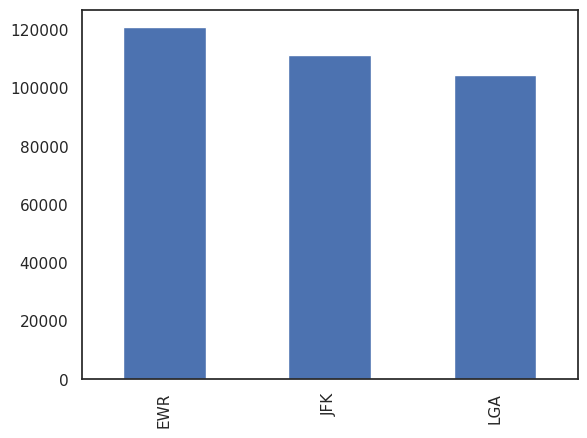

In [100]:
df['origin'].value_counts().plot.bar()

# 2. Data Cleaning

First we will copy the original dataframe into a new dataframe for making the changes in that new dataframe so that our original data is not impacted.

In [101]:
df1=df
df1

Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                1  2013      1    1     517.0             515        2.0   
1                2  2013      1    1     533.0             529        4.0   
2                3  2013      1    1     542.0             540        2.0   
3                4  2013      1    1     544.0             545       -1.0   
4                5  2013      1    1     554.0             600       -6.0   
...            ...   ...    ...  ...       ...             ...        ...   
336771      336772  2013      9   30       NaN            1455        NaN   
336772      336773  2013      9   30       NaN            2200        NaN   
336773      336774  2013      9   30       NaN            1210        NaN   
336774      336775  2013      9   30       NaN            1159        NaN   
336775      336776  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin  \
0          830.0             819       11.0      UA    1545  N14228    EWR   
1          850.0             830       20.0      UA    1714  N24211    LGA   
2          923.0             850       33.0      AA    1141  N619AA    JFK   
3         1004.0            1022      -18.0      B6     725  N804JB    JFK   
4          812.0             837      -25.0      DL     461  N668DN    LGA   
...          ...             ...        ...     ...     ...     ...    ...   
336771       NaN            1634        NaN      9E    3393     NaN    JFK   
336772       NaN            2312        NaN      9E    3525     NaN    LGA   
336773       NaN            1330        NaN      MQ    3461  N535MQ    LGA   
336774       NaN            1344        NaN      MQ    3572  N511MQ    LGA   
336775       NaN            1020        NaN      MQ    3531  N839MQ    LGA   

       dest  air_time  distance  hour  minute            time_hour  
0       IAH     227.0      1400     5      15  2013-01-01 05:00:00  
1       IAH     227.0      1416     5      29  2013-01-01 05:00:00  
2       MIA     160.0      1089     5      40  2013-01-01 05:00:00  
3       BQN     183.0      1576     5      45  2013-01-01 05:00:00  
4       ATL     116.0       762     6       0  2013-01-01 06:00:00  
...     ...       ...       ...   ...     ...                  ...  
336771  DCA       NaN       213    14      55  2013-09-30 14:00:00  
336772  SYR       NaN       198    22       0  2013-09-30 22:00:00  
336773  BNA       NaN       764    12      10  2013-09-30 12:00:00  
336774  CLE       NaN       419    11      59  2013-09-30 11:00:00  
336775  RDU       NaN       431     8      40  2013-09-30 08:00:00  

[336776 rows x 20 columns]

> ## **2.1** Remove unwanted columns

In [102]:
variables_to_remove = ['Unnamed: 0','flight']
df1.drop(variables_to_remove, axis = 1, inplace = True)
df1

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier tailnum origin dest  air_time  \
0                  819       11.0      UA  N14228    EWR  IAH     227.0   
1                  830       20.0      UA  N24211    LGA  IAH     227.0   
2                  850       33.0      AA  N619AA    JFK  MIA     160.0   
3                 1022      -18.0      B6  N804JB    JFK  BQN     183.0   
4                  837      -25.0      DL  N668DN    LGA  ATL     116.0   
...                ...        ...     ...     ...    ...  ...       ...   
336771            1634        NaN      9E     NaN    JFK  DCA       NaN   
336772            2312        NaN      9E     NaN    LGA  SYR       NaN   
336773            1330        NaN      MQ  N535MQ    LGA  BNA       NaN   
336774            1344        NaN      MQ  N511MQ    LGA  CLE       NaN   
336775            1020        NaN      MQ  N839MQ    LGA  RDU       NaN   

        distance  hour  minute            time_hour  
0           1400     5      15  2013-01-01 05:00:00  
1           1416     5      29  2013-01-01 05:00:00  
2           1089     5      40  2013-01-01 05:00:00  
3           1576     5      45  2013-01-01 05:00:00  
4            762     6       0  2013-01-01 06:00:00  
...          ...   ...     ...                  ...  
336771       213    14      55  2013-09-30 14:00:00  
336772       198    22       0  2013-09-30 22:00:00  
336773       764    12      10  2013-09-30 12:00:00  
336774       419    11      59  2013-09-30 11:00:00  
336775       431     8      40  2013-09-30 08:00:00  

[336776 rows x 18 columns]

We have removed 'Unnamed: 0' and 'flight' column.

> ## **2.2** Checking for missing/ null values and remove/ replace it

In [103]:
#Check the no. of missing values in each column along with the percentage of values present in it.

missing_df = df1.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df1.shape[0]-missing_df['missing values'])/df1.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

variable  missing values  filling factor (%)
0        arr_delay            9430           97.199919
1         air_time            9430           97.199919
2         arr_time            8713           97.412820
3         dep_time            8255           97.548816
4        dep_delay            8255           97.548816
5          tailnum            2512           99.254104
6             hour               0          100.000000
7         distance               0          100.000000
8             dest               0          100.000000
9           origin               0          100.000000
10            year               0          100.000000
11          minute               0          100.000000
12  sched_arr_time               0          100.000000
13  sched_dep_time               0          100.000000
14             day               0          100.000000
15           month               0          100.000000
16         carrier               0          100.000000
17       time_hour               0          100.000000

Since the percentage of missing values are very less, we will go ahead and drop those rows from the dataset

In [104]:
#Drop the blank rows
df1.dropna(inplace = True)
df1.isnull().sum

df1

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336765  2013      9   30    2240.0            2245       -5.0    2334.0   
336766  2013      9   30    2240.0            2250      -10.0    2347.0   
336767  2013      9   30    2241.0            2246       -5.0    2345.0   
336768  2013      9   30    2307.0            2255       12.0    2359.0   
336769  2013      9   30    2349.0            2359      -10.0     325.0   

        sched_arr_time  arr_delay carrier tailnum origin dest  air_time  \
0                  819       11.0      UA  N14228    EWR  IAH     227.0   
1                  830       20.0      UA  N24211    LGA  IAH     227.0   
2                  850       33.0      AA  N619AA    JFK  MIA     160.0   
3                 1022      -18.0      B6  N804JB    JFK  BQN     183.0   
4                  837      -25.0      DL  N668DN    LGA  ATL     116.0   
...                ...        ...     ...     ...    ...  ...       ...   
336765            2351      -17.0      B6  N354JB    JFK  SYR      41.0   
336766               7      -20.0      B6  N281JB    JFK  BUF      52.0   
336767               1      -16.0      B6  N346JB    JFK  ROC      47.0   
336768            2358        1.0      B6  N565JB    JFK  BOS      33.0   
336769             350      -25.0      B6  N516JB    JFK  PSE     196.0   

        distance  hour  minute            time_hour  
0           1400     5      15  2013-01-01 05:00:00  
1           1416     5      29  2013-01-01 05:00:00  
2           1089     5      40  2013-01-01 05:00:00  
3           1576     5      45  2013-01-01 05:00:00  
4            762     6       0  2013-01-01 06:00:00  
...          ...   ...     ...                  ...  
336765       209    22      45  2013-09-30 22:00:00  
336766       301    22      50  2013-09-30 22:00:00  
336767       264    22      46  2013-09-30 22:00:00  
336768       187    22      55  2013-09-30 22:00:00  
336769      1617    23      59  2013-09-30 23:00:00  

[327346 rows x 18 columns]

Now we can see that there are 9450 rows less in the latest data

> ## **2.3** Time column format correction

For the columns '**dep_time**', '**sched_dep_time**', '**arr_time**' and '**sched_arr_time**', the hour of the take-off is coded as a float where the two first digits indicate the hour and the two last, the minutes. This format is not convenient for the python to process and it has to be converted.

In [105]:
############ ---------------  'dep_time' ---------------  ############
##### ---- Convert the column into 'int' datatype for 'dep_time'

# Clean float column by removing non-numeric characters
df1['dep_time'] = df1['dep_time'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert cleaned float column to int
df1['dep_time'] = df1['dep_time'].astype(float).astype(int)

##### ---- Convert the non-formatted column to correct Time format for 'dep_time'

# Convert Time column to string
df1['dep_time'] = df1['dep_time'].astype(str)

# Pad leading zeros if necessary
df1['dep_time'] = df1['dep_time'].str.zfill(4)

# Extract hour and minute components
df1['dep_time_Hour'] = df1['dep_time'].str[:-2].astype(int)
df1['dep_time_Minute'] = df1['dep_time'].str[-2:].astype(int)

# Adjust hour if necessary (e.g., 24-hour format)
df1.loc[df1['dep_time_Hour'] < 0, 'dep_time_Hour'] = df1['dep_time_Hour'] % 24

# Format as hh:mm string
df1['dep_time1'] = df1.apply(lambda row: f"{row['dep_time_Hour']:02d}:{row['dep_time_Minute']:02d}", axis=1)



############ ---------------  'sched_dep_time' ---------------  ############
##### ---- Convert the column into 'int' datatype for 'sched_dep_time'

# Clean float column by removing non-numeric characters
df1['sched_dep_time'] = df1['sched_dep_time'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert cleaned float column to int
df1['sched_dep_time'] = df1['sched_dep_time'].astype(float).astype(int)

##### ---- Convert the non-formatted column to correct Time format for 'sched_dep_time'

# Convert Time column to string
df1['sched_dep_time'] = df1['sched_dep_time'].astype(str)

# Pad leading zeros if necessary
df1['sched_dep_time'] = df1['sched_dep_time'].str.zfill(4)

# Extract hour and minute components
df1['sched_dep_time_Hour'] = df1['sched_dep_time'].str[:-2].astype(int)
df1['sched_dep_time_Minute'] = df1['sched_dep_time'].str[-2:].astype(int)

# Adjust hour if necessary (e.g., 24-hour format)
df1.loc[df1['sched_dep_time_Hour'] < 0, 'sched_dep_time_Hour'] = df1['sched_dep_time_Hour'] % 24

# Format as hh:mm string
df1['sched_dep_time1'] = df1.apply(lambda row: f"{row['sched_dep_time_Hour']:02d}:{row['sched_dep_time_Minute']:02d}", axis=1)



############ ---------------  'arr_time' ---------------  ############
##### ---- Convert the column into 'int' datatype for 'arr_time'

# Clean float column by removing non-numeric characters
df1['arr_time'] = df1['arr_time'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert cleaned float column to int
df1['arr_time'] = df1['arr_time'].astype(float).astype(int)

##### ---- Convert the non-formatted column to correct Time format for 'arr_time'

# Convert Time column to string
df1['arr_time'] = df1['arr_time'].astype(str)

# Pad leading zeros if necessary
df1['arr_time'] = df1['arr_time'].str.zfill(4)

# Extract hour and minute components
df1['arr_time_Hour'] = df1['arr_time'].str[:-2].astype(int)
df1['arr_time_Minute'] = df1['arr_time'].str[-2:].astype(int)

# Adjust hour if necessary (e.g., 24-hour format)
df1.loc[df1['arr_time_Hour'] < 0, 'arr_time_Hour'] = df1['arr_time_Hour'] % 24

# Format as hh:mm string
df1['arr_time1'] = df1.apply(lambda row: f"{row['arr_time_Hour']:02d}:{row['arr_time_Minute']:02d}", axis=1)



############ ---------------  'sched_arr_time' ---------------  ############
##### ---- Convert the column into 'int' datatype for 'sched_arr_time'

# Clean float column by removing non-numeric characters
df1['sched_arr_time'] = df1['sched_arr_time'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert cleaned float column to int
df1['sched_arr_time'] = df1['sched_arr_time'].astype(float).astype(int)

##### ---- Convert the non-formatted column to correct Time format for 'sched_arr_time'

# Convert Time column to string
df1['sched_arr_time'] = df1['sched_arr_time'].astype(str)

# Pad leading zeros if necessary
df1['sched_arr_time'] = df1['sched_arr_time'].str.zfill(4)

# Extract hour and minute components
df1['sched_arr_time_Hour'] = df1['sched_arr_time'].str[:-2].astype(int)
df1['sched_arr_time_Minute'] = df1['sched_arr_time'].str[-2:].astype(int)

# Adjust hour if necessary (e.g., 24-hour format)
df1.loc[df1['sched_arr_time_Hour'] < 0, 'sched_arr_time_Hour'] = df1['sched_arr_time_Hour'] % 24

# Format as hh:mm string
df1['sched_arr_time1'] = df1.apply(lambda row: f"{row['sched_arr_time_Hour']:02d}:{row['sched_arr_time_Minute']:02d}", axis=1)



#Delete the extra columns created 
variables_to_remove = ['sched_dep_time_Hour','sched_dep_time_Minute','dep_time_Hour','dep_time_Minute','arr_time_Hour','arr_time_Minute','sched_arr_time_Hour','sched_arr_time_Minute']
df1.drop(variables_to_remove, axis = 1, inplace = True)

df1

year  month  day dep_time sched_dep_time  dep_delay arr_time  \
0       2013      1    1     0517           0515        2.0     0830   
1       2013      1    1     0533           0529        4.0     0850   
2       2013      1    1     0542           0540        2.0     0923   
3       2013      1    1     0544           0545       -1.0     1004   
4       2013      1    1     0554           0600       -6.0     0812   
...      ...    ...  ...      ...            ...        ...      ...   
336765  2013      9   30     2240           2245       -5.0     2334   
336766  2013      9   30     2240           2250      -10.0     2347   
336767  2013      9   30     2241           2246       -5.0     2345   
336768  2013      9   30     2307           2255       12.0     2359   
336769  2013      9   30     2349           2359      -10.0     0325   

       sched_arr_time  arr_delay carrier  ... dest air_time distance  hour  \
0                0819       11.0      UA  ...  IAH    227.0     1400     5   
1                0830       20.0      UA  ...  IAH    227.0     1416     5   
2                0850       33.0      AA  ...  MIA    160.0     1089     5   
3                1022      -18.0      B6  ...  BQN    183.0     1576     5   
4                0837      -25.0      DL  ...  ATL    116.0      762     6   
...               ...        ...     ...  ...  ...      ...      ...   ...   
336765           2351      -17.0      B6  ...  SYR     41.0      209    22   
336766           0007      -20.0      B6  ...  BUF     52.0      301    22   
336767           0001      -16.0      B6  ...  ROC     47.0      264    22   
336768           2358        1.0      B6  ...  BOS     33.0      187    22   
336769           0350      -25.0      B6  ...  PSE    196.0     1617    23   

        minute            time_hour  dep_time1 sched_dep_time1 arr_time1  \
0           15  2013-01-01 05:00:00      05:17           05:15     08:30   
1           29  2013-01-01 05:00:00      05:33           05:29     08:50   
2           40  2013-01-01 05:00:00      05:42           05:40     09:23   
3           45  2013-01-01 05:00:00      05:44           05:45     10:04   
4            0  2013-01-01 06:00:00      05:54           06:00     08:12   
...        ...                  ...        ...             ...       ...   
336765      45  2013-09-30 22:00:00      22:40           22:45     23:34   
336766      50  2013-09-30 22:00:00      22:40           22:50     23:47   
336767      46  2013-09-30 22:00:00      22:41           22:46     23:45   
336768      55  2013-09-30 22:00:00      23:07           22:55     23:59   
336769      59  2013-09-30 23:00:00      23:49           23:59     03:25   

       sched_arr_time1  
0                08:19  
1                08:30  
2                08:50  
3                10:22  
4                08:37  
...                ...  
336765           23:51  
336766           00:07  
336767           00:01  
336768           23:58  
336769           03:50  

[327346 rows x 22 columns]

> ## **2.4** Categorizing the delays flight as low/medium/extreme

In [106]:
# dep_delay is in minutes
on_time = 0 
low =180
medium = 650
df1['dep_delay_category'] = ''
df1.loc[df1['dep_delay'] <= on_time, 'dep_delay_category'] = 'on_time'
df1.loc[(df1['dep_delay'] <= low) & (df1['dep_delay'] > on_time), 'dep_delay_category'] = 'low'
df1.loc[(df1['dep_delay'] <= medium) & (df1['dep_delay'] > low), 'dep_delay_category'] = 'medium'
df1.loc[df1['dep_delay'] >= medium, 'dep_delay_category'] = 'extreme'


# arr_delay is in minutes
on_time = 0 
low =180
medium = 650
df1['arr_delay_category'] = ''
df1.loc[df1['arr_delay'] <= on_time, 'arr_delay_category'] = 'on_time'
df1.loc[(df1['arr_delay'] <= low) & (df1['arr_delay'] > on_time), 'arr_delay_category'] = 'low'
df1.loc[(df1['arr_delay'] <= medium) & (df1['arr_delay'] > low), 'arr_delay_category'] = 'medium'
df1.loc[df1['arr_delay'] >= medium, 'arr_delay_category'] = 'extreme'

df1

year  month  day dep_time sched_dep_time  dep_delay arr_time  \
0       2013      1    1     0517           0515        2.0     0830   
1       2013      1    1     0533           0529        4.0     0850   
2       2013      1    1     0542           0540        2.0     0923   
3       2013      1    1     0544           0545       -1.0     1004   
4       2013      1    1     0554           0600       -6.0     0812   
...      ...    ...  ...      ...            ...        ...      ...   
336765  2013      9   30     2240           2245       -5.0     2334   
336766  2013      9   30     2240           2250      -10.0     2347   
336767  2013      9   30     2241           2246       -5.0     2345   
336768  2013      9   30     2307           2255       12.0     2359   
336769  2013      9   30     2349           2359      -10.0     0325   

       sched_arr_time  arr_delay carrier  ... distance hour minute  \
0                0819       11.0      UA  ...     1400    5     15   
1                0830       20.0      UA  ...     1416    5     29   
2                0850       33.0      AA  ...     1089    5     40   
3                1022      -18.0      B6  ...     1576    5     45   
4                0837      -25.0      DL  ...      762    6      0   
...               ...        ...     ...  ...      ...  ...    ...   
336765           2351      -17.0      B6  ...      209   22     45   
336766           0007      -20.0      B6  ...      301   22     50   
336767           0001      -16.0      B6  ...      264   22     46   
336768           2358        1.0      B6  ...      187   22     55   
336769           0350      -25.0      B6  ...     1617   23     59   

                  time_hour  dep_time1  sched_dep_time1  arr_time1  \
0       2013-01-01 05:00:00      05:17            05:15      08:30   
1       2013-01-01 05:00:00      05:33            05:29      08:50   
2       2013-01-01 05:00:00      05:42            05:40      09:23   
3       2013-01-01 05:00:00      05:44            05:45      10:04   
4       2013-01-01 06:00:00      05:54            06:00      08:12   
...                     ...        ...              ...        ...   
336765  2013-09-30 22:00:00      22:40            22:45      23:34   
336766  2013-09-30 22:00:00      22:40            22:50      23:47   
336767  2013-09-30 22:00:00      22:41            22:46      23:45   
336768  2013-09-30 22:00:00      23:07            22:55      23:59   
336769  2013-09-30 23:00:00      23:49            23:59      03:25   

       sched_arr_time1 dep_delay_category arr_delay_category  
0                08:19                low                low  
1                08:30                low                low  
2                08:50                low                low  
3                10:22            on_time            on_time  
4                08:37            on_time            on_time  
...                ...                ...                ...  
336765           23:51            on_time            on_time  
336766           00:07            on_time            on_time  
336767           00:01            on_time            on_time  
336768           23:58                low                low  
336769           03:50            on_time            on_time  

[327346 rows x 24 columns]

> ## **2.5** Setting the IQR

<AxesSubplot:>

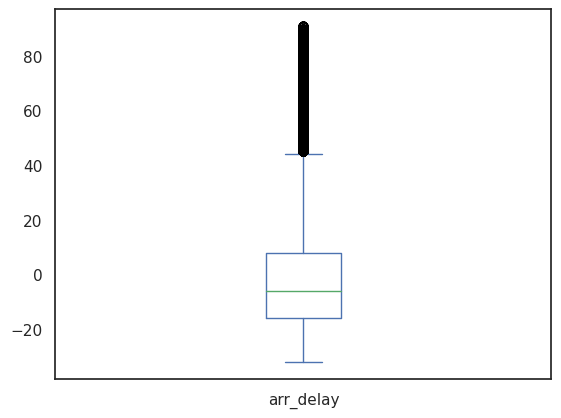

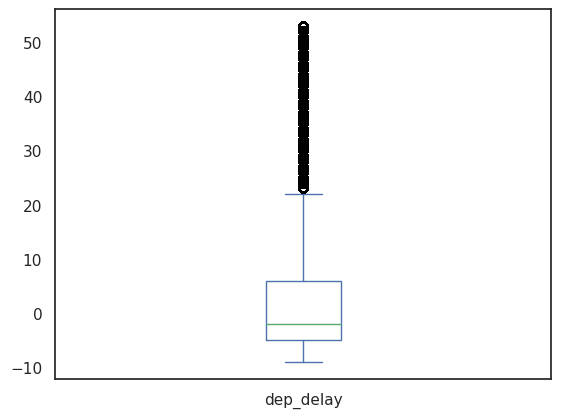

In [107]:
# Setting Inter Qartile Range

# assuming df is your DataFrame and 'column' is the column from which you want to remove outliers

Q1 = df1['arr_delay'].quantile(0.05) # change to the start of your custom range
Q3 = df1['arr_delay'].quantile(0.95) # change to the end of your custom range
# Only keep rows in the dataframe that are within the custom IQR
df1 = df1[(df1['arr_delay'] >= Q1) & (df1['arr_delay'] <= Q3)]

Q1 = df1['dep_delay'].quantile(0.05) # change to the start of your custom range
Q3 = df1['dep_delay'].quantile(0.95) # change to the end of your custom range
# Only keep rows in the dataframe that are within the custom IQR
df1 = df1[(df1['dep_delay'] >= Q1) & (df1['dep_delay'] <= Q3)]

df1[['arr_delay']].plot.box()
df1[['dep_delay']].plot.box()

> ## **2.6** Getting dummy variables

In [108]:
column_names = df1.columns.tolist()
df1

print(column_names)

['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour', 'dep_time1', 'sched_dep_time1', 'arr_time1', 'sched_arr_time1', 'dep_delay_category', 'arr_delay_category']


# 3. 2D Plots

> **The Correlation Matrix**

This shows the relation of all the variables with each other. 

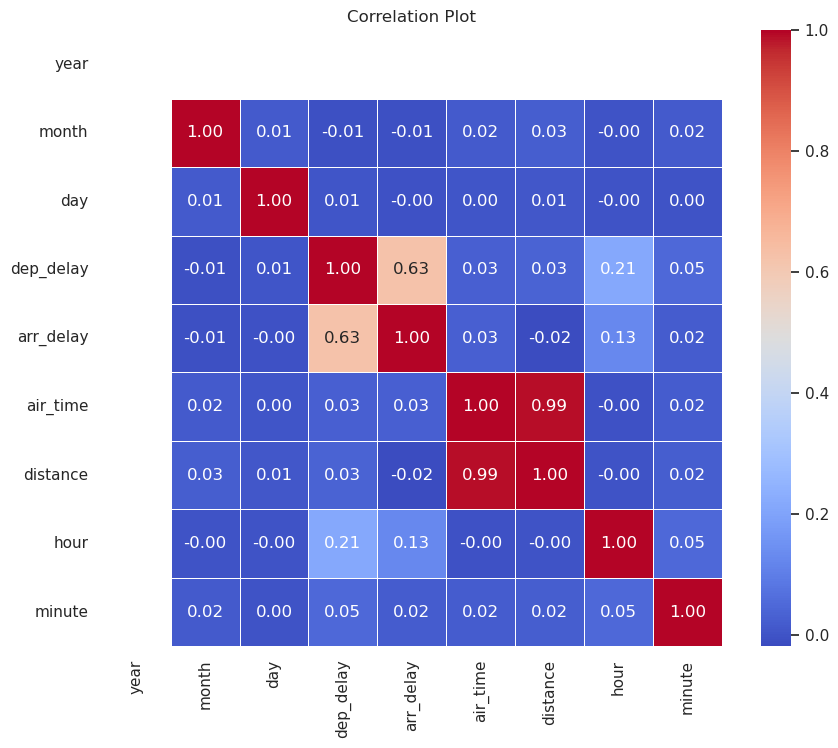

In [109]:
# Compute the correlation matrix
corr = df1.corr()

# Generate a correlation plot using seaborn
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

> **Pair Plot**

The plot shows the correlation of the variable with each other in a graphical format.

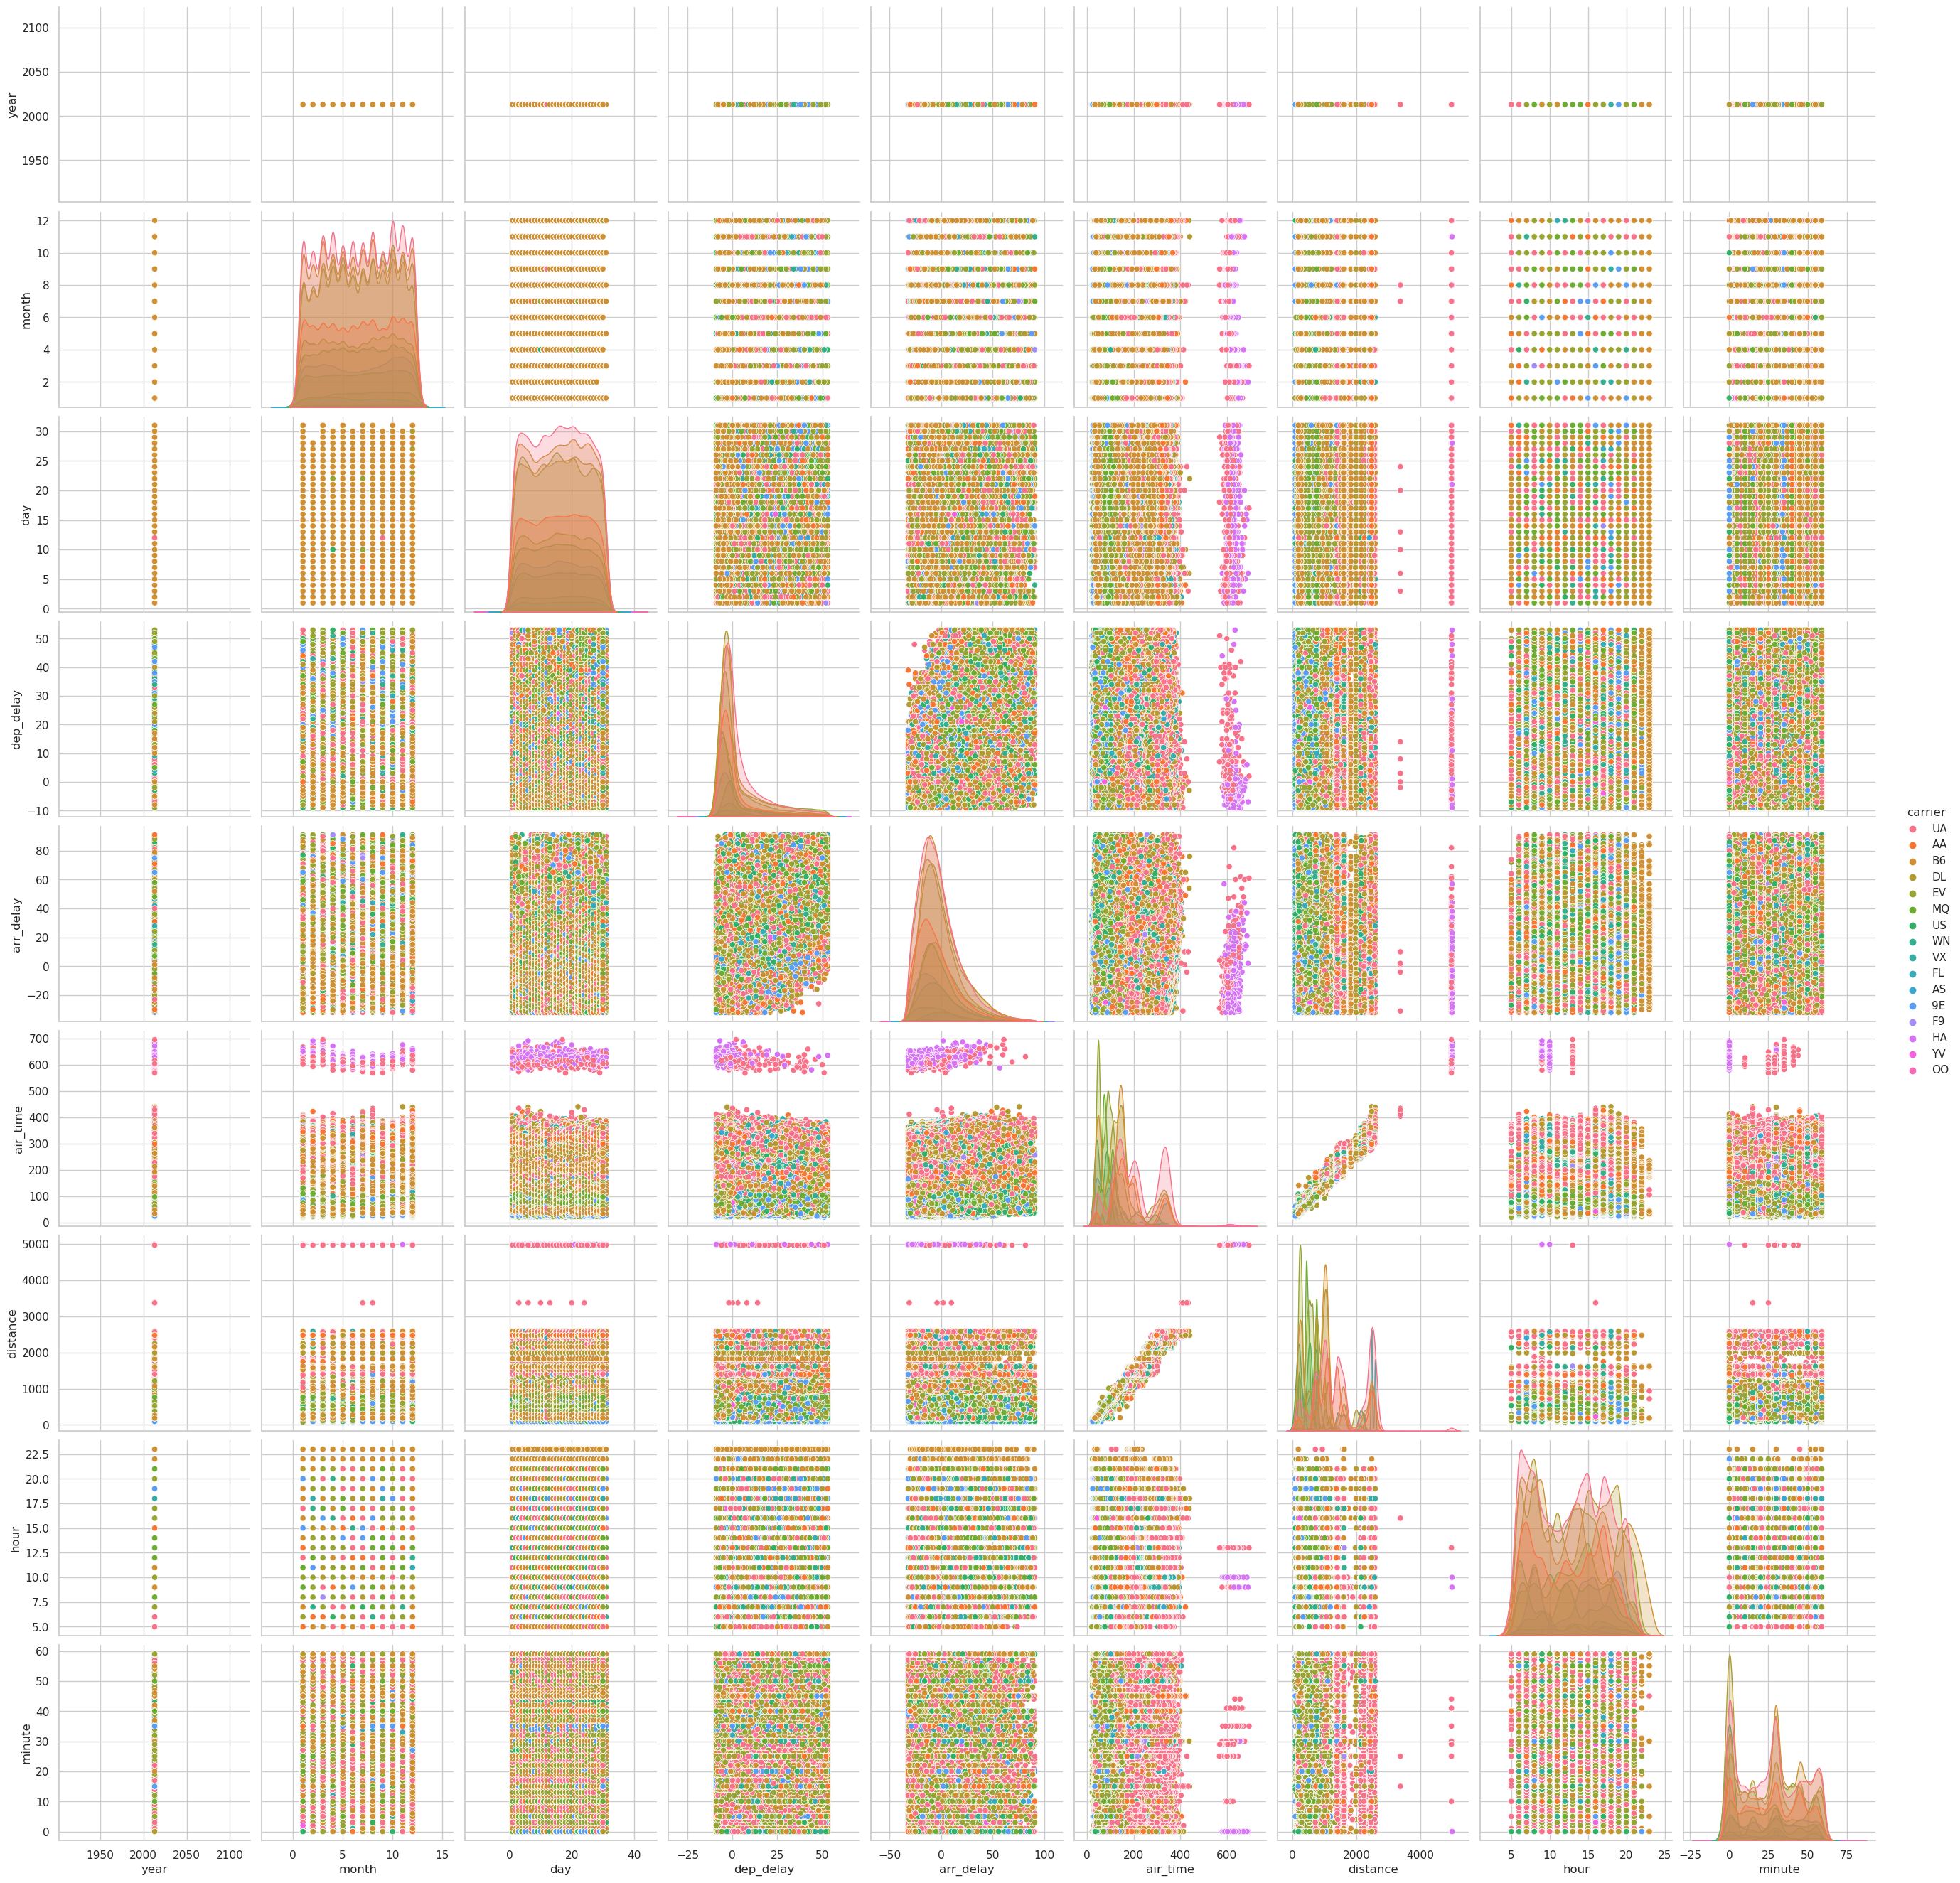

In [164]:
#Pair Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df1, hue="carrier", height=3);
plt.show()

The below graph shows relation of all the Carriers with respect to the time taken for them to reach the destination.

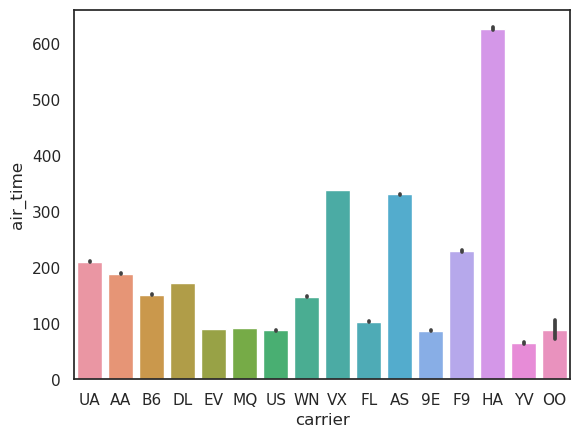

In [111]:
sns.barplot(x='carrier', y='air_time', data=df1)
plt.show()

This shows the relation of Departure Delay in relation with different Origins

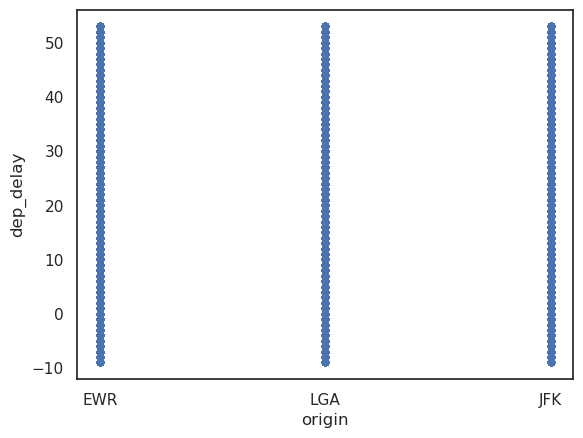

In [112]:
df1.plot(kind='scatter', x='origin', y='dep_delay') ;
plt.show()

This graph represents Departure Delay with respect to the count of flights as per the Origins

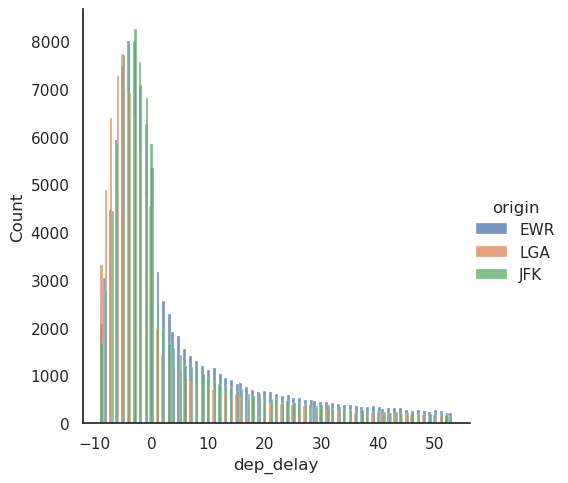

In [113]:
sns.FacetGrid(df1, hue="origin", height=5) \
   .map(sns.histplot, "dep_delay") \
   .add_legend();
plt.show();

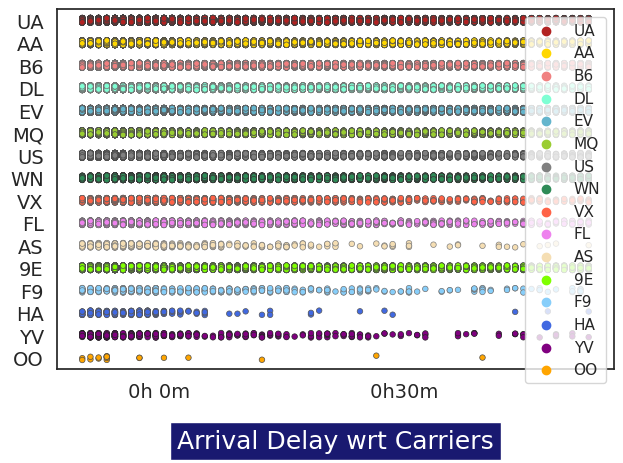

In [114]:
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue',
          'purple', 'orange']


# Specify the desired tick positions in minutes
tick_positions = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]

# Set the tick positions on the x-axis
plt.xticks(tick_positions)

# Plot the graph
ax3 = sns.stripplot(y="carrier", x="dep_delay", size=4, palette=colors, hue='carrier',
                    data=df1, linewidth=0.5, jitter=True)

# Set the font size for the tick labels
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

# Format the tick labels as hours and minutes
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)])
                     for x in ax3.get_xticks()])

# Set the x-axis label and its properties
plt.xlabel('Arrival Delay wrt Carriers', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)

# Hide the y-axis label
ax3.yaxis.label.set_visible(False)

# Add a legend with explicit location (e.g., upper right)
ax3.legend(loc='upper right')

# Adjust the layout
plt.tight_layout(w_pad=3)

# Show the plot
plt.show()


# 4. 3D Plots

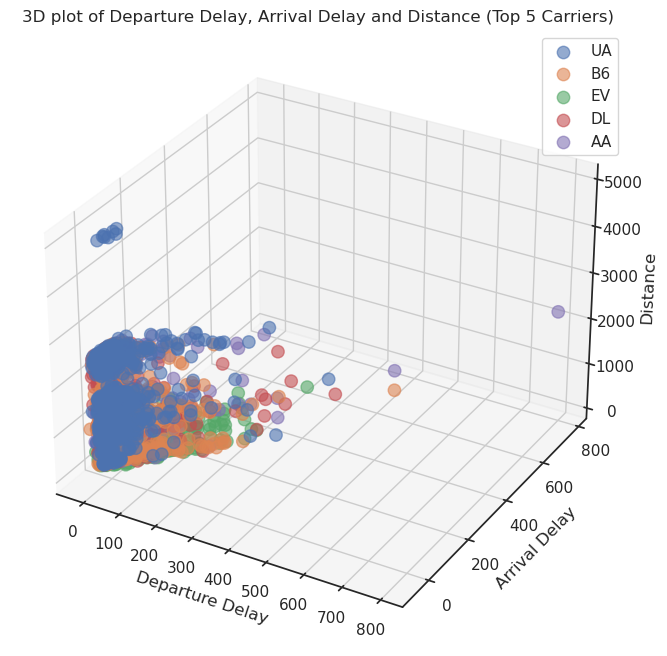

In [115]:
# For better visualization, we will only consider the top 5 carriers with the most flights
top_carriers = df['carrier'].value_counts().index[:5]

# Filter the data to include only the top 5 carriers
filtered_df = df[df['carrier'].isin(top_carriers)]

subset_df_3d = filtered_df.sample(n=5000, random_state=1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for carrier in top_carriers:
	subset = subset_df_3d[subset_df_3d['carrier'] == carrier]
	ax.scatter(subset['dep_delay'], subset['arr_delay'], subset['distance'], alpha=0.6, s=80, label=carrier)

ax.set_xlabel('Departure Delay')
ax.set_ylabel('Arrival Delay')
ax.set_zlabel('Distance')

plt.title('3D plot of Departure Delay, Arrival Delay and Distance (Top 5 Carriers)')
plt.legend()
plt.show()


# 5. Modeling

We will be taking a sample of data from the dataset. Kaggle does not support this huge data for modeling.

In [116]:
df2 = df.sample(n=10000)

Again we will be removing unwanted columns and keeping only the once which is highly correlated with the models

In [117]:
variables_to_remove = ['dep_time','origin','arr_time','sched_dep_time','sched_arr_time','dest','time_hour','tailnum']
df2.drop(variables_to_remove, axis = 1, inplace = True)

df2

year  month  day  dep_delay  arr_delay carrier  air_time  distance  \
202045  2013      5   10        3.0      -11.0      B6      87.0       636   
166552  2013      4    2       -3.0      -12.0      UA      73.0       404   
20278   2013      1   24       -6.0      -13.0      B6     151.0      1065   
299978  2013      8   21       -8.0      -33.0      EV      32.0       169   
274366  2013      7   26        2.0      -11.0      UA     180.0      1400   
...      ...    ...  ...        ...        ...     ...       ...       ...   
266792  2013      7   18       -2.0      -31.0      AA     292.0      2475   
81825   2013     11   29        0.0        0.0      MQ      42.0       213   
46159   2013     10   21       -5.0      -17.0      9E     164.0      1107   
197207  2013      5    5       -3.0      -13.0      UA     194.0      1416   
126821  2013      2   18       16.0       -1.0      9E      46.0       209   

        hour  minute dep_time1 sched_dep_time1 arr_time1 sched_arr_time1  \
202045     8       0     08:03           08:00     09:47           09:58   
166552    14      35     14:32           14:35     16:00           16:12   
20278     10       0     09:54           10:00     12:52           13:05   
299978    21      59     21:51           21:59     22:46           23:19   
274366     8      53     08:55           08:53     11:29           11:40   
...      ...     ...       ...             ...       ...             ...   
266792    12       0     11:58           12:00     14:19           14:50   
81825     11       0     11:00           11:00     12:10           12:10   
46159     15      50     15:45           15:50     17:59           18:16   
197207     8      10     08:07           08:10     10:45           10:58   
126821    18      20     18:36           18:20     19:49           19:50   

       dep_delay_category arr_delay_category  
202045                low            on_time  
166552            on_time            on_time  
20278             on_time            on_time  
299978            on_time            on_time  
274366                low            on_time  
...                   ...                ...  
266792            on_time            on_time  
81825             on_time            on_time  
46159             on_time            on_time  
197207            on_time            on_time  
126821                low            on_time  

[10000 rows x 16 columns]

In [118]:
#Check the no. of missing values in each column along with the percentage of values present in it.

missing_df = df2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df2.shape[0]-missing_df['missing values'])/df2.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

variable  missing values  filling factor (%)
0                 year               0               100.0
1                month               0               100.0
2                  day               0               100.0
3            dep_delay               0               100.0
4            arr_delay               0               100.0
5              carrier               0               100.0
6             air_time               0               100.0
7             distance               0               100.0
8                 hour               0               100.0
9               minute               0               100.0
10           dep_time1               0               100.0
11     sched_dep_time1               0               100.0
12           arr_time1               0               100.0
13     sched_arr_time1               0               100.0
14  dep_delay_category               0               100.0
15  arr_delay_category               0               100.0

In [119]:
#Drop the blank rows
df2.dropna(inplace = True)
df2.isnull().sum

df2.head()

year  month  day  dep_delay  arr_delay carrier  air_time  distance  \
202045  2013      5   10        3.0      -11.0      B6      87.0       636   
166552  2013      4    2       -3.0      -12.0      UA      73.0       404   
20278   2013      1   24       -6.0      -13.0      B6     151.0      1065   
299978  2013      8   21       -8.0      -33.0      EV      32.0       169   
274366  2013      7   26        2.0      -11.0      UA     180.0      1400   

        hour  minute dep_time1 sched_dep_time1 arr_time1 sched_arr_time1  \
202045     8       0     08:03           08:00     09:47           09:58   
166552    14      35     14:32           14:35     16:00           16:12   
20278     10       0     09:54           10:00     12:52           13:05   
299978    21      59     21:51           21:59     22:46           23:19   
274366     8      53     08:55           08:53     11:29           11:40   

       dep_delay_category arr_delay_category  
202045                low            on_time  
166552            on_time            on_time  
20278             on_time            on_time  
299978            on_time            on_time  
274366                low            on_time

In [120]:
# dep_delay is in minutes
on_time = 0 
low =180
medium = 650
df2['dep_delay_category'] = ''
df2.loc[df2['dep_delay'] <= on_time, 'dep_delay_category'] = 'on_time'
df2.loc[(df2['dep_delay'] <= low) & (df2['dep_delay'] > on_time), 'dep_delay_category'] = 'low'
df2.loc[(df2['dep_delay'] <= medium) & (df2['dep_delay'] > low), 'dep_delay_category'] = 'medium'
df2.loc[df2['dep_delay'] >= medium, 'dep_delay_category'] = 'extreme'


# arr_delay is in minutes
on_time = 0 
low =180
medium = 650
df2['arr_delay_category'] = ''
df2.loc[df2['arr_delay'] <= on_time, 'arr_delay_category'] = 'on_time'
df2.loc[(df2['arr_delay'] <= low) & (df2['arr_delay'] > on_time), 'arr_delay_category'] = 'low'
df2.loc[(df2['arr_delay'] <= medium) & (df2['arr_delay'] > low), 'arr_delay_category'] = 'medium'
df2.loc[df2['arr_delay'] >= medium, 'arr_delay_category'] = 'extreme'

df2

year  month  day  dep_delay  arr_delay carrier  air_time  distance  \
202045  2013      5   10        3.0      -11.0      B6      87.0       636   
166552  2013      4    2       -3.0      -12.0      UA      73.0       404   
20278   2013      1   24       -6.0      -13.0      B6     151.0      1065   
299978  2013      8   21       -8.0      -33.0      EV      32.0       169   
274366  2013      7   26        2.0      -11.0      UA     180.0      1400   
...      ...    ...  ...        ...        ...     ...       ...       ...   
266792  2013      7   18       -2.0      -31.0      AA     292.0      2475   
81825   2013     11   29        0.0        0.0      MQ      42.0       213   
46159   2013     10   21       -5.0      -17.0      9E     164.0      1107   
197207  2013      5    5       -3.0      -13.0      UA     194.0      1416   
126821  2013      2   18       16.0       -1.0      9E      46.0       209   

        hour  minute dep_time1 sched_dep_time1 arr_time1 sched_arr_time1  \
202045     8       0     08:03           08:00     09:47           09:58   
166552    14      35     14:32           14:35     16:00           16:12   
20278     10       0     09:54           10:00     12:52           13:05   
299978    21      59     21:51           21:59     22:46           23:19   
274366     8      53     08:55           08:53     11:29           11:40   
...      ...     ...       ...             ...       ...             ...   
266792    12       0     11:58           12:00     14:19           14:50   
81825     11       0     11:00           11:00     12:10           12:10   
46159     15      50     15:45           15:50     17:59           18:16   
197207     8      10     08:07           08:10     10:45           10:58   
126821    18      20     18:36           18:20     19:49           19:50   

       dep_delay_category arr_delay_category  
202045                low            on_time  
166552            on_time            on_time  
20278             on_time            on_time  
299978            on_time            on_time  
274366                low            on_time  
...                   ...                ...  
266792            on_time            on_time  
81825             on_time            on_time  
46159             on_time            on_time  
197207            on_time            on_time  
126821                low            on_time  

[10000 rows x 16 columns]

Use the Label Encoding for better accuracy

In [121]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'arr_delay_category'. 
df2['arr_delay']= label_encoder.fit_transform(df2['arr_delay_category'])
df2['dep_delay']= label_encoder.fit_transform(df2['dep_delay_category']) 
df2['carrier']= label_encoder.fit_transform(df2['carrier']) 
print(df2.head())

        year  month  day  dep_delay  arr_delay  carrier  air_time  distance  \
202045  2013      5   10          1          3        3      87.0       636   
166552  2013      4    2          3          3       10      73.0       404   
20278   2013      1   24          3          3        3     151.0      1065   
299978  2013      8   21          3          3        5      32.0       169   
274366  2013      7   26          1          3       10     180.0      1400   

        hour  minute dep_time1 sched_dep_time1 arr_time1 sched_arr_time1  \
202045     8       0     08:03           08:00     09:47           09:58   
166552    14      35     14:32           14:35     16:00           16:12   
20278     10       0     09:54           10:00     12:52           13:05   
299978    21      59     21:51           21:59     22:46           23:19   
274366     8      53     08:55           08:53     11:29           11:40   

       dep_delay_category arr_delay_category  
202045               

In [122]:
variables_to_remove = ['arr_delay_category','dep_delay_category']
df2.drop(variables_to_remove, axis = 1, inplace = True)

In [123]:
df2

year  month  day  dep_delay  arr_delay  carrier  air_time  distance  \
202045  2013      5   10          1          3        3      87.0       636   
166552  2013      4    2          3          3       10      73.0       404   
20278   2013      1   24          3          3        3     151.0      1065   
299978  2013      8   21          3          3        5      32.0       169   
274366  2013      7   26          1          3       10     180.0      1400   
...      ...    ...  ...        ...        ...      ...       ...       ...   
266792  2013      7   18          3          3        1     292.0      2475   
81825   2013     11   29          3          3        9      42.0       213   
46159   2013     10   21          3          3        0     164.0      1107   
197207  2013      5    5          3          3       10     194.0      1416   
126821  2013      2   18          1          3        0      46.0       209   

        hour  minute dep_time1 sched_dep_time1 arr_time1 sched_arr_time1  
202045     8       0     08:03           08:00     09:47           09:58  
166552    14      35     14:32           14:35     16:00           16:12  
20278     10       0     09:54           10:00     12:52           13:05  
299978    21      59     21:51           21:59     22:46           23:19  
274366     8      53     08:55           08:53     11:29           11:40  
...      ...     ...       ...             ...       ...             ...  
266792    12       0     11:58           12:00     14:19           14:50  
81825     11       0     11:00           11:00     12:10           12:10  
46159     15      50     15:45           15:50     17:59           18:16  
197207     8      10     08:07           08:10     10:45           10:58  
126821    18      20     18:36           18:20     19:49           19:50  

[10000 rows x 14 columns]

Upsampling / Downsampling

> ## **5.1** Random Forest

Random Forest is a powerful and popular ensemble learning method used for classification tasks.
It is known for its high accuracy in predicting both categorical and continuous target variables. By aggregating the predictions from multiple trees, it tends to produce more robust and reliable results compared to individual decision trees.
Grid search was performed for cross-validation to evaluate the model's performance for different n_estimators.
Grid range between 50 to 100 was carried out to evaluate performance of model.


In [124]:
##Random Forest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error


# Prepare the feature matrix (X) and target variable (y)
X = df2[['month','day','distance','dep_delay','air_time','carrier']]  # Specify the relevant features/columns
y = df2['arr_delay']  # Specify the target variable/column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Creating the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100)  # Number of trees can be adjusted

# Training the Random Forest classifier
rfc.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_rfc = rfc.predict(X_test)

# Evaluating the R^2 score and Mean Squared Error of the model
r2 = r2_score(y_test, y_pred_rfc)
mse = mean_squared_error(y_test, y_pred_rfc)
print("R^2 Score of Random Forest:", r2)
print("Mean Squared Error of Random Forest:", mse)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of Random Forest:", accuracy)

R^2 Score of Random Forest: 0.051732722395426034
Mean Squared Error of Random Forest: 0.8898
Accuracy of Random Forest: 0.775


Build Confusion Matrix for **Random Forest**

In [141]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rfc)

report = classification_report(y_test, y_pred_rfc, zero_division=1)
# Print the full detailed confusion matrix
print("Confusion Matrix for Random Forest:")
print(report)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.73      0.65      0.69      1905
           2       0.88      0.82      0.85        55
           3       0.80      0.85      0.82      3039

    accuracy                           0.78      5000
   macro avg       0.85      0.58      0.59      5000
weighted avg       0.77      0.78      0.77      5000

Confusion matrix

 [[   0    1    0    0]
 [   0 1241    6  658]
 [   0    8   45    2]
 [   0  450    0 2589]]

True Positives(TP) =  0

True Negatives(TN) =  1241

False Positives(FP) =  1

False Negatives(FN) =  0


In [146]:
from sklearn.metrics import precision_score, confusion_matrix


# Getting the unique class labels from y_true and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred_rfc)))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc, labels=unique_labels)

# Getting precision scores from the confusion matrix, with zero_division=1	
with np.errstate(divide='ignore', invalid='ignore'):	
    precision_scores = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0, where=np.sum(conf_matrix, axis=0) != 0)	
# Handle division by zero (set to NaN) and replace NaN with -1	
precision_scores[np.isnan(precision_scores)] = -1

# Printing precision scores and corresponding class labels
for class_label, precision in zip(unique_labels, precision_scores):
    print(f"Class {class_label}: {precision:.2f}")


Class 0: -1.00
Class 1: 0.73
Class 2: 0.88
Class 3: 0.80


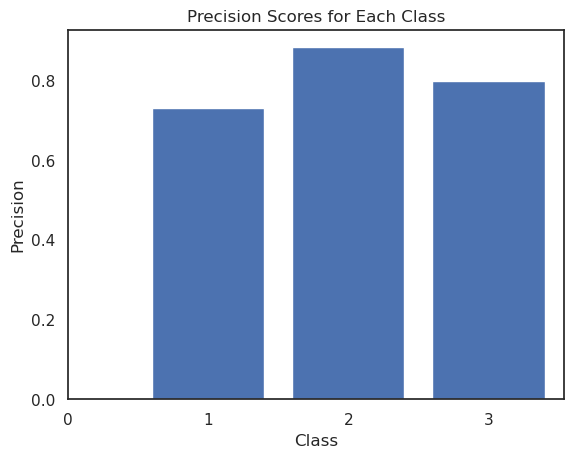

In [127]:
# Plotting precision scores for each class
plt.bar(unique_labels, precision_scores)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Scores for Each Class')
plt.xticks(unique_labels)
plt.show()

**Feature Importance**

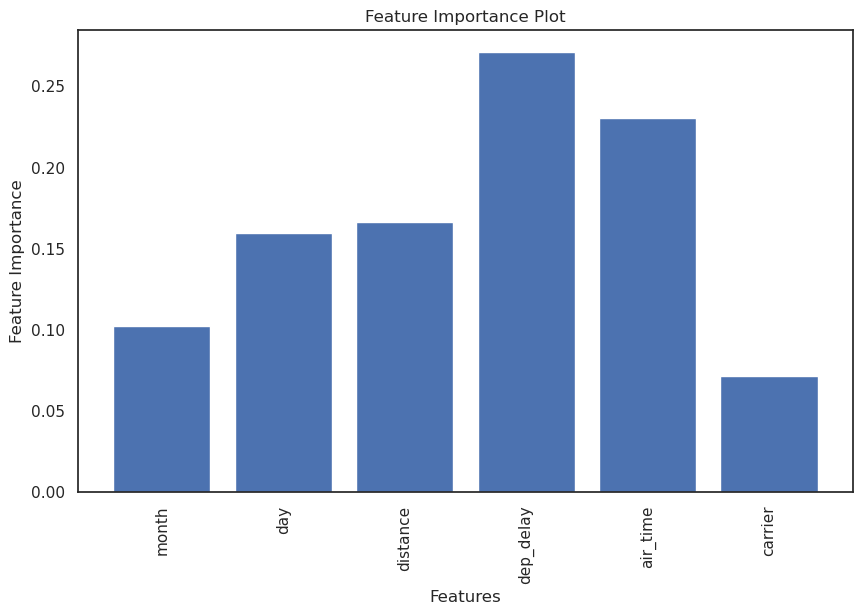

In [128]:
##rm
import matplotlib.pyplot as plt

# Getting feature importances from the trained model
feature_importances = rfc.feature_importances_

# Creating a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()


**Creating a learning curve plot**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


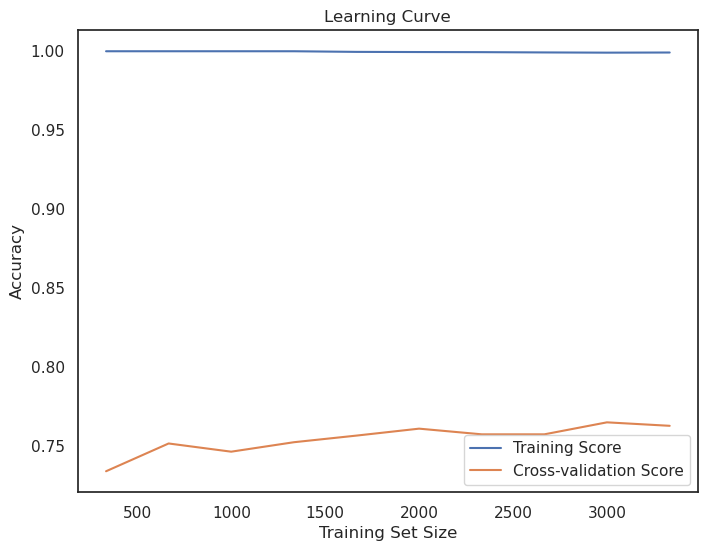

In [151]:
from sklearn.model_selection import learning_curve

# Creating a learning curve plot with cv=3
train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

> ## **5.2** KNN

K-Nearest Neighbors (KNN) is a simple yet powerful non-parametric classification algorithm.
KNN is a non-parametric algorithm, meaning it does not assume any specific underlying data distribution. Instead, it learns from the training data directly, making it versatile and suitable for a wide range of data types and distributions.


In [130]:
# KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Prepare the feature matrix (X) and target variable (y)
X = df2[['month','day','distance','dep_delay','air_time','carrier']]  # Specify the relevant features/columns
y = df2['arr_delay']  # Specify the target variable/column

# Scale the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=19)  # Specify the number of neighbors

# Train the KNN classifier on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test)

# Evaluating the R^2 score and Mean Squared Error of the model
r2 = r2_score(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
print("R^2 Score of KNN:", r2)
print("Mean Squared Error of KNN:", mse)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN for n = 19:", accuracy)


R^2 Score of KNN: 0.03596023901877088
Mean Squared Error of KNN: 0.9046
Accuracy of KNN for n = 19: 0.7662


E.g. we tried with n = 8 but did not get appropriate results

Similarly, we choose the following values of n and took 19 as the best suited value for the model.
* Accuracy of KNN 3: 0.7383855533261305
* Accuracy of KNN 4: 0.7312856922364562
* Accuracy of KNN 5: 0.7504758964860833
* Accuracy of KNN 8: 0.7552091372125328
* Accuracy of KNN 15: 0.767813963060143
* Accuracy of KNN 19: 0.7686371353603951
* Accuracy of KNN 40: 0.7656016875032156

Build Confusion Matrix for **KNN**

In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_knn)

report = classification_report(y_test, y_pred_knn, zero_division=1)
# Print the full detailed confusion matrix
print("Confusion Matrix for KNN:")
print(report)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix for KNN:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.72      0.65      0.69      1905
           2       1.00      0.09      0.17        55
           3       0.79      0.85      0.82      3039

    accuracy                           0.77      5000
   macro avg       0.88      0.40      0.42      5000
weighted avg       0.77      0.77      0.76      5000

Confusion matrix

 [[   0    1    0    0]
 [   0 1244    0  661]
 [   0   24    5   26]
 [   0  457    0 2582]]

True Positives(TP) =  0

True Negatives(TN) =  1244

False Positives(FP) =  1

False Negatives(FN) =  0


**K selection graph**

Model's performance on a separate validation set or through cross-validation  to avoid overfitting and select the best K value. 
Grid search was performed to find best K-value. From the given chart we get to know k value between 12 to 20 gives less error rate.


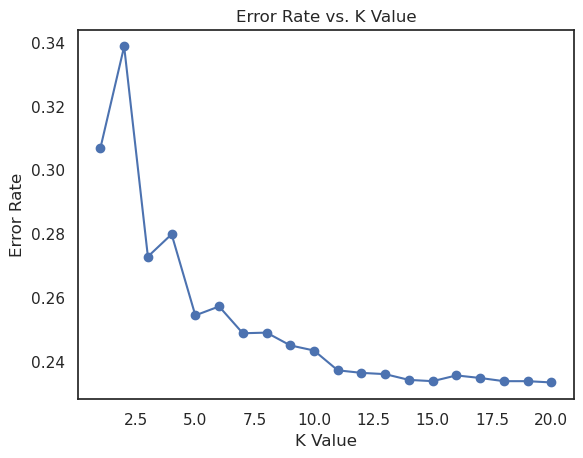

In [132]:
import matplotlib.pyplot as plt

error_rates = []
k_values = range(1, 21)  # You can choose a range of K values to test

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_KN = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_KN)
    error_rates.append(1 - accuracy)

# Plotting the error rate vs. K value
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')
plt.show()


**Learning curve for KNN**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


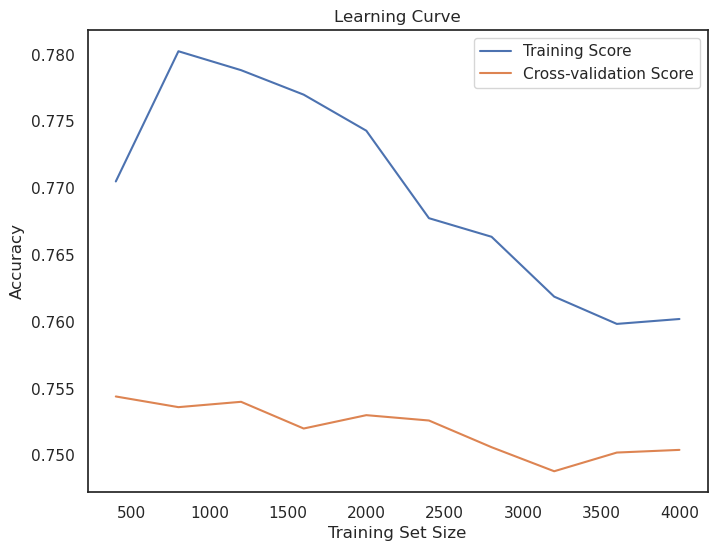

In [163]:
from sklearn.model_selection import learning_curve

# Creating a learning curve plot
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [154]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, confusion_matrix


# Getting the unique class labels from y_true and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred_KN)))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KN, labels=unique_labels)

# Getting precision scores from the confusion matrix, with zero_division=1	
with np.errstate(divide='ignore', invalid='ignore'):	
    precision_scores = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0, where=np.sum(conf_matrix, axis=0) != 0)	
# Handle division by zero (set to NaN) and replace NaN with -1	
precision_scores[np.isnan(precision_scores)] = -1

# Printing precision scores and corresponding class labels
for class_label, precision in zip(unique_labels, precision_scores):
    print(f"Class {class_label}: {precision:.2f}")


Class 0: -1.00
Class 1: 0.72
Class 2: 1.00
Class 3: 0.79


Precision Score for KNN

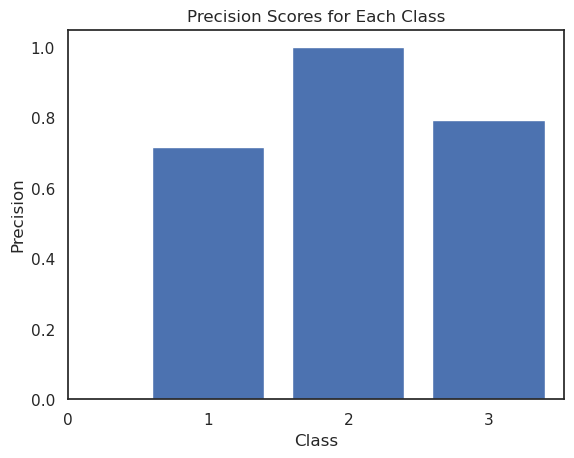

In [135]:
# Plotting precision scores for each class
plt.bar(unique_labels, precision_scores)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Scores for Each Class')
plt.xticks(unique_labels)
plt.show()

**KNN comparison**

* Accuracy of KNN with 80 and 20% test and train : 0.7651905252317199
* Accuracy of KNN with 50 and 50 % test and train : 0.7547908510199877
* Accuraccy by adding carrier as well column converted into label encoding and  80 and 20%  train and test size
* Accuracy of KNN: 0.735
* Accuraccy by adding carrier as well column converted into label encoding and  0.5  train and test size
* Accuracy of KNN: 0.7476
* accuracy with downsampling
* Accuracy of KNN: 0.7411063129755295

> ## **5.3** Naive Bayes

Naive Bayes is a simple yet powerful probabilistic classification algorithm that is widely used in various machine learning applications. 
Simplicity and Efficiency: It is a simple and easy-to-understand algorithm. It is computationally efficient and can handle large datasets with a relatively small amount of memory, making it well-suited for real-time or online learning scenarios.


In [136]:
#Naive Bayes

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the feature matrix (X) and target variable (y)
X = df2[['month','day','distance','dep_delay','air_time','carrier']]  # Specify the relevant features/columns
y = df2['arr_delay']  # Specify the target variable/column


# Scale the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create an instance of the Naive Bayes classifier
nb = GaussianNB()

# Train the Naive Bayes classifier on the training set
nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_nb = nb.predict(X_test)

# Evaluating the R^2 score and Mean Squared Error of the model
r2 = r2_score(y_test, y_pred_nb)
mse = mean_squared_error(y_test, y_pred_nb)
print("R^2 Score of Naive Bayes:", r2)
print("Mean Squared Error of Naive Bayes:", mse)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes:", accuracy)

R^2 Score of Naive Bayes: 0.04768303071763613
Mean Squared Error of Naive Bayes: 0.8936
Accuracy of Naive Bayes: 0.7682


Build Confusion Matrix for **Naive Bayes**

In [155]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_nb)

report = classification_report(y_test, y_pred_nb, zero_division=1)
# Print the full detailed confusion matrix
print("Confusion Matrix for Naive Bayes:")
print(report)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.72      0.68      0.70      1905
           2       1.00      0.00      0.00        55
           3       0.80      0.84      0.82      3039

    accuracy                           0.77      5000
   macro avg       0.88      0.38      0.38      5000
weighted avg       0.77      0.77      0.76      5000

Confusion matrix

 [[   0    1    0    0]
 [   0 1300    0  605]
 [   0    9    0   46]
 [   0  498    0 2541]]

True Positives(TP) =  0

True Negatives(TN) =  1300

False Positives(FP) =  1

False Negatives(FN) =  0


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


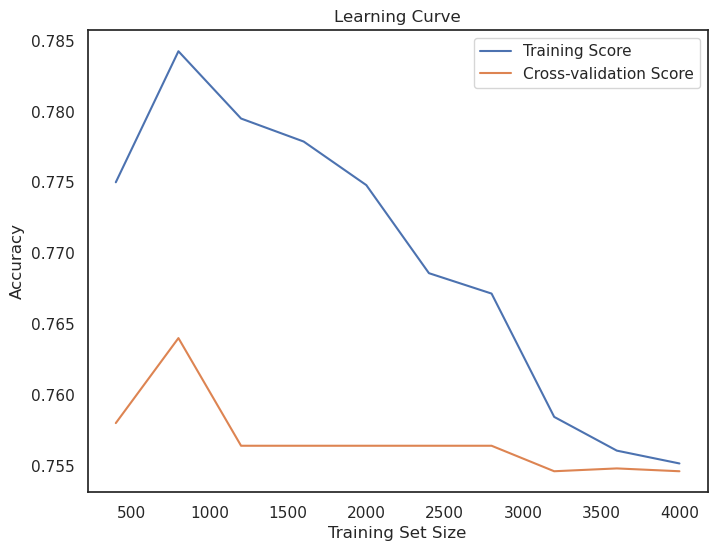

In [138]:
from sklearn.model_selection import learning_curve

# Creating a learning curve plot
train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [156]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, confusion_matrix


# Getting the unique class labels from y_true and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred_nb)))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb, labels=unique_labels)

# Getting precision scores from the confusion matrix, with zero_division=1	
with np.errstate(divide='ignore', invalid='ignore'): precision_scores = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0, where=np.sum(conf_matrix, axis=0) != 0)	

# Handle division by zero (set to NaN) and replace NaN with -1
precision_scores[np.isnan(precision_scores)] = -1

# Printing precision scores and corresponding class labels
for class_label, precision in zip(unique_labels, precision_scores):
    print(f"Class {class_label}: {precision:.2f}")


Class 0: -1.00
Class 1: 0.72
Class 2: -1.00
Class 3: 0.80


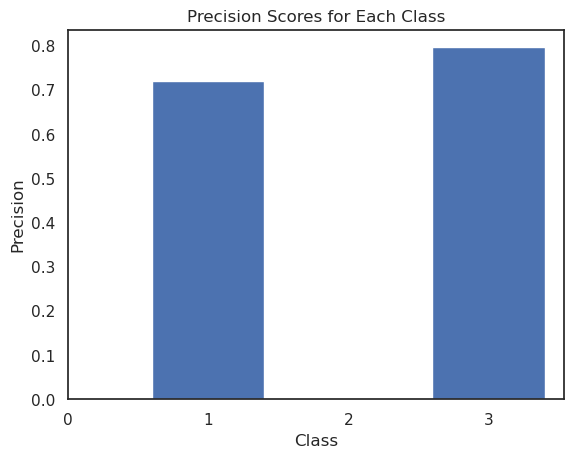

In [140]:
# Plotting precision scores for each class
plt.bar(unique_labels, precision_scores)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Scores for Each Class')
plt.xticks(unique_labels)
plt.show()